**Автор: Анна Смелова**

## Решение домашнего задания к уроку 7 “Многомерный статистический анализ. Линейная регрессия”

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Задача
#### Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
$$zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]$$
$$ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]$$
#### Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

**<font color='darkblue'>Решение:</font>**<br>

In [2]:
zp = np.array([35,45,190,200,40,70,54,150,120,110], dtype=np.float64)
ks = np.array([401,574,874,919,459,739,653,902,746,832], dtype=np.float64)

In [3]:
x = zp
y = ks

1. Без использования intersept (a_1=0):<br>
$$y = b_1x$$
$\Rightarrow b_1=\frac{\overline{y}}{\overline{x}}$

In [4]:
y_mean = np.mean(y)
x_mean = np.mean(x)
b_1 = y_mean / x_mean
print(f'Без использования intersept: a=0, b={b_1}')

Без использования intersept: a=0, b=7.000986193293885


2. С использованием intersept ($a_2\neq0$):<br>
$$y = a_2 + b_2x$$
$\Rightarrow b_2 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}; a_2 = \overline{y} - b \cdot {\overline{x}}.$

In [5]:
b_2 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a_2 = np.mean(y) - b_2 * np.mean(x)
print(f'С использованием intersept: a={a_2}, b={b_2}')

С использованием intersept: a=444.1773573243596, b=2.620538882402765


In [6]:
y_pred_1 = b_1 * x
y_pred_2 = a_2 + b_2 * x

In [7]:
df = pd.DataFrame({'x': x, 'y': y, 'y_pred_1': y_pred_1, 'y_pred_2': y_pred_2 }, columns=['x', 'y', 'y_pred_1', 'y_pred_2'])
df

,x,y,y_pred_1,y_pred_2
0,35.0,401.0,245.034517,535.896218
1,45.0,574.0,315.044379,562.101607
2,190.0,874.0,1330.187377,942.079745
3,200.0,919.0,1400.197239,968.285134
4,40.0,459.0,280.039448,548.998913
5,70.0,739.0,490.069034,627.615079
6,54.0,653.0,378.053254,585.686457
7,150.0,902.0,1050.147929,837.258190
8,120.0,746.0,840.118343,758.642023
9,110.0,832.0,770.108481,732.436634


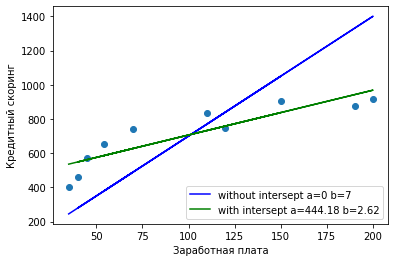

In [8]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred_1'], label='without intersept a=0 b=7', color='blue')
plt.plot(df['x'], df['y_pred_2'], label='with intersept a=444.18 b=2.62', color='green')
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.legend(loc="lower right")
plt.show()

Прямая, построенная с intersept более точно приближает исходные данные, чем прямая, построенная без него.

### 2. Задача
#### Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

**<font color='darkblue'>Решение:</font>**<br>

$$y=\beta_1\cdot x$$
$$\beta_1 \leftarrow \beta_1-\frac{2\alpha}{n}\sum_{i=1}^{n}{x_i(\beta_1x_i-y_i)}$$

In [9]:
print(f'x = {x}')
print(f'y = {y}')

x = [ 35.  45. 190. 200.  40.  70.  54. 150. 120. 110.]
y = [401. 574. 874. 919. 459. 739. 653. 902. 746. 832.]


In [10]:
n = len(x)
print(f'n={n}')

n=10


In [11]:
def mse_(B1,y=y,x=x,n=n):
    return np.sum((B1*x-y)**2)/n

In [12]:
alpha = 1e-6
print(f'alpha = {alpha}')

alpha = 1e-06


In [13]:
B1 = 0.1

In [14]:
for i in range(10):
    B1 -= alpha * (2 / n) * np.sum((B1 * x - y) * x)
    print(f'{i}: B1 = {B1}, mse = {mse_(B1)}')

0: B1 = 0.25952808, mse = 493237.7212546963
1: B1 = 0.414660650906144, mse = 469503.15593253804
2: B1 = 0.5655188230595969, mse = 447058.4982813111
3: B1 = 0.7122203698240712, mse = 425833.6454035351
4: B1 = 0.8548798195302346, mse = 405762.3042994031
5: B1 = 0.9936085448867542, mse = 386781.7848094311
6: B1 = 1.1285148499277806, mse = 368832.80381009757
7: B1 = 1.2597040545647504, mse = 351859.3000509065
8: B1 = 1.387278576808517, mse = 335808.2590545421
9: B1 = 1.5113380127259965, mse = 320629.547533212


In [15]:
for i in range(100):
    B1 -= alpha * (2 / n) * np.sum((B1 * x - y) * x)
    if i%10==0:
        print(f'{i}: B1 = {B1}, mse = {mse_(B1)}')

0: B1 = 1.6319792141937546, mse = 306275.7568040035
10: B1 = 2.6698789606516935, mse = 199352.96411174876
20: B1 = 3.4547782236263824, mse = 138204.25062502263
30: B1 = 4.04834889855975, mse = 103233.54824312925
40: B1 = 4.497229618367758, mse = 83233.94472982832
50: B1 = 4.836690291080364, mse = 71796.25222021657
60: B1 = 5.093403362579137, mse = 65255.0820486468
70: B1 = 5.287539550879594, mse = 61514.21323463749
80: B1 = 5.434352720103083, mse = 59374.825462025976
90: B1 = 5.54537842245223, mse = 58151.31823171113


In [16]:
for i in range(5000):
    B1 -= alpha * (2 / n) * np.sum((B1 * x - y) * x)
    if i%500==0:
        print(f'{i}: B1 = {B1}, mse = {mse_(B1)}')

0: B1 = 5.629340281237233, mse = 57451.59938606899
500: B1 = 5.889820196929507, mse = 56516.85841572009
1000: B1 = 5.889820420132498, mse = 56516.85841571941
1500: B1 = 5.889820420132673, mse = 56516.85841571943
2000: B1 = 5.889820420132673, mse = 56516.85841571943
2500: B1 = 5.889820420132673, mse = 56516.85841571943
3000: B1 = 5.889820420132673, mse = 56516.85841571943
3500: B1 = 5.889820420132673, mse = 56516.85841571943
4000: B1 = 5.889820420132673, mse = 56516.85841571943
4500: B1 = 5.889820420132673, mse = 56516.85841571943


In [17]:
y_pred_3 = B1 * x
df['y_pred_3'] = y_pred_3
df

,x,y,y_pred_1,y_pred_2,y_pred_3
0,35.0,401.0,245.034517,535.896218,206.143715
1,45.0,574.0,315.044379,562.101607,265.041919
2,190.0,874.0,1330.187377,942.079745,1119.065880
3,200.0,919.0,1400.197239,968.285134,1177.964084
4,40.0,459.0,280.039448,548.998913,235.592817
5,70.0,739.0,490.069034,627.615079,412.287429
6,54.0,653.0,378.053254,585.686457,318.050303
7,150.0,902.0,1050.147929,837.258190,883.473063
8,120.0,746.0,840.118343,758.642023,706.778450
9,110.0,832.0,770.108481,732.436634,647.880246


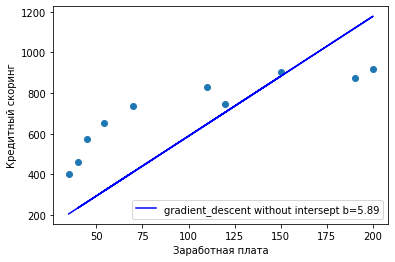

In [18]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred_3'], label='gradient_descent without intersept b=5.89', color='blue')
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.legend(loc="lower right")
plt.show()

### 3. Задача
#### В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

**<font color='darkblue'>Решение:</font>**<br><br>
В случае, когда известна дисперсия (и, соответственно, среднеквадратическое отклонение) ГЕНЕРАЛЬНОЙ СОВОКУПНОСТИ, используется таблица значений функции Лапласа.<br>
В случае, когда дисперсия генеральной совокупности неизвестна, используется таблица критических точек распределения Стьюдента.

### 4*. Задача
#### Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

**<font color='darkblue'>Решение:</font>**<br>

$$y=a_2+\beta_2\cdot x$$
$$a_2 \leftarrow a_2-\frac{2\alpha}{n}\sum_{i=1}^{n}{((a_2+\beta_2x_i)-y_i)}$$
$$\beta_2 \leftarrow \beta_2-\frac{2\alpha}{n}\sum_{i=1}^{n}{x_i((a_2+\beta_2x_i)-y_i)}$$

In [19]:
A2 = 100
B2 = 0.1
alpha = 1e-5

In [20]:
def mse2_(A2,B2,y=y,x=x,n=n):
    return np.sum(((A2+B2*x)-y)**2)/n

In [21]:
for i in range(10):
    A2 -= alpha * (2 / n) * np.sum((A2 + B2 * x) - y)
    B2 -= alpha * (2 / n) * np.sum(((A2 + B2 * x) - y) * x)
    print(f'{i}: A2 = {A2}, B2 = {B2}, mse = {mse2_(A2, B2)}')

0: A2 = 100.0119952, B2 = 1.4924564737344004, mse = 221188.36688854443
1: A2 = 100.02116625836727, B2 = 2.501228031441445, mse = 133437.2950361376
2: A2 = 100.02829134459434, B2 = 3.2320362946354835, mse = 87381.96305969775
3: A2 = 100.03393420916193, B2 = 3.761472051725799, mse = 63210.16838716254
4: A2 = 100.03850326515685, B2 = 4.145022049747948, mse = 50523.70458799081
5: A2 = 100.04229439037465, B2 = 4.422884061313116, mse = 43865.19164655711
6: A2 = 100.0455219356105, B2 = 4.6241796516459726, mse = 40370.38514008706
7: A2 = 100.04834118883825, B2 = 4.770006147937691, mse = 38536.01808238481
8: A2 = 100.05086464954645, B2 = 4.875647660474843, mse = 37573.11702178345
9: A2 = 100.05317381879802, B2 = 4.952176872784366, mse = 37067.59746057168


In [22]:
for i in range(100):
    A2 -= alpha * (2 / n) * np.sum((A2 + B2 * x) - y)
    B2 -= alpha * (2 / n) * np.sum(((A2 + B2 * x) - y) * x)
    if i%10==0:
        print(f'{i}: A2 = {A2}, B2 = {B2}, mse = {mse2_(A2, B2)}')

0: A2 = 100.05532774062364, B2 = 5.007615470014359, mse = 36802.13124782141
10: A2 = 100.07381532172069, B2 = 5.147474103090799, mse = 36506.63705654138
20: A2 = 100.09131266699053, B2 = 5.152920238478886, mse = 36503.12405274039
30: A2 = 100.10876972842085, B2 = 5.153013754156794, mse = 36500.076207492486
40: A2 = 100.12622433540673, B2 = 5.152894122020477, mse = 36497.029481014
50: A2 = 100.14367799444794, B2 = 5.1527660080880935, mse = 36493.9830678163
60: A2 = 100.16113076558004, B2 = 5.152637562647898, mse = 36490.93696382033
70: A2 = 100.1785826512369, B2 = 5.152509110263474, mse = 36487.89116887798
80: A2 = 100.19603365155855, B2 = 5.152380663859399, mse = 36484.845682953324
90: A2 = 100.21348376659373, B2 = 5.152252223950043, mse = 36481.800506014784


In [23]:
for i in range(10000):
    A2 -= alpha * (2 / n) * np.sum((A2 + B2 * x) - y)
    B2 -= alpha * (2 / n) * np.sum(((A2 + B2 * x) - y) * x)
    if i%1000==0:
        print(f'{i}: A2 = {A2}, B2 = {B2}, mse = {mse2_(A2, B2)}')

0: A2 = 100.2309329963875, B2 = 5.152123790555573, mse = 36478.75563803109
1000: A2 = 101.97139320765861, B2 = 5.139313298884659, mse = 36175.823692823775
2000: A2 = 103.70304622823728, B2 = 5.126567631702278, mse = 35875.949822772694
3000: A2 = 105.42593662484643, B2 = 5.1138864609793115, mse = 35579.103156839585
4000: A2 = 107.14010873868958, B2 = 5.1012694603465505, mse = 35285.25313562703
5000: A2 = 108.84560668659161, B2 = 5.088716305086308, mse = 34994.36950823243
6000: A2 = 110.54247436213511, B2 = 5.076226672124047, mse = 34706.42232913375
7000: A2 = 112.23075543678905, B2 = 5.06380024002008, mse = 34421.38195510674
8000: A2 = 113.91049336103345, B2 = 5.051436688961284, mse = 34139.2190421733
9000: A2 = 115.58173136547701, B2 = 5.039135700752881, mse = 33859.90454258055


In [24]:
for i in range(5000000):
    A2 -= alpha * (2 / n) * np.sum((A2 + B2 * x) - y)
    B2 -= alpha * (2 / n) * np.sum(((A2 + B2 * x) - y) * x)
    if i%500000==0:
        print(f'{i}: A2 = {A2}, B2 = {B2}, mse = {mse2_(A2, B2)}')


0: A2 = 117.24451246197067, B2 = 5.026896958810238, mse = 33583.40970181045
500000: A2 = 418.30438711494827, B2 = 2.8109744161903625, mse = 6640.220177729347
1000000: A2 = 442.1298096460562, B2 = 2.635609662136104, mse = 6471.477679008628
1500000: A2 = 444.01531750206647, B2 = 2.6217315610864835, mse = 6470.4208616318565
2000000: A2 = 444.1645337382354, B2 = 2.6206332691874628, mse = 6470.414242890421
2500000: A2 = 444.17634248517584, B2 = 2.6205463520299515, mse = 6470.414201437904
3000000: A2 = 444.1772770115227, B2 = 2.620539473537755, mse = 6470.414201178296
3500000: A2 = 444.17735096852226, B2 = 2.620538929184301, mse = 6470.414201176671
4000000: A2 = 444.17735682134906, B2 = 2.620538886105127, mse = 6470.414201176662
4500000: A2 = 444.1773572846247, B2 = 2.6205388826952305, mse = 6470.414201176658


In [25]:
y_pred_4 = A2 + B2 * x
df['y_pred_4'] = y_pred_4
df

,x,y,y_pred_1,y_pred_2,y_pred_3,y_pred_4
0,35.0,401.0,245.034517,535.896218,206.143715,535.896218
1,45.0,574.0,315.044379,562.101607,265.041919,562.101607
2,190.0,874.0,1330.187377,942.079745,1119.065880,942.079745
3,200.0,919.0,1400.197239,968.285134,1177.964084,968.285134
4,40.0,459.0,280.039448,548.998913,235.592817,548.998913
5,70.0,739.0,490.069034,627.615079,412.287429,627.615079
6,54.0,653.0,378.053254,585.686457,318.050303,585.686457
7,150.0,902.0,1050.147929,837.258190,883.473063,837.258190
8,120.0,746.0,840.118343,758.642023,706.778450,758.642023
9,110.0,832.0,770.108481,732.436634,647.880246,732.436634


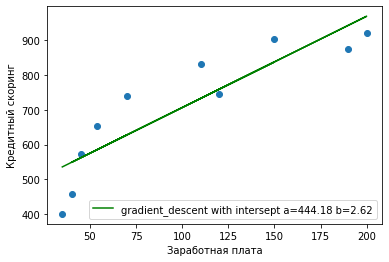

In [26]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred_4'], label='gradient_descent with intersept a=444.18 b=2.62', color='green')
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.legend(loc="lower right")
plt.show()

Все результаты на одном графике:

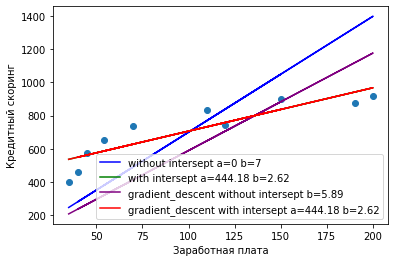

In [27]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred_1'], label='without intersept a=0 b=7', color='blue')
plt.plot(df['x'], df['y_pred_2'], label='with intersept a=444.18 b=2.62', color='green')
plt.plot(df['x'], df['y_pred_3'], label='gradient_descent without intersept b=5.89', color='purple')
plt.plot(df['x'], df['y_pred_4'], label='gradient_descent with intersept a=444.18 b=2.62', color='red')
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.legend(loc="lower right")
plt.show()